<a href="https://colab.research.google.com/github/Akshita-jpg/Assignment-Topsis/blob/main/TOPSIS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [3]:
df = pd.read_csv('data.csv')
df


,Model,Cost,Quality,Delivery
0,A1,250,7,3
1,A2,200,9,4
2,A3,300,6,2


In [4]:
data = df.iloc[:, 1:].astype(float)

weights = np.array([1,1,1])
impacts = ['+','+','-']

norm = data / np.sqrt((data**2).sum())
weighted = norm * weights

ideal_best = []
ideal_worst = []

for i in range(len(impacts)):
    if impacts[i] == '+':
        ideal_best.append(weighted.iloc[:, i].max())
        ideal_worst.append(weighted.iloc[:, i].min())
    else:
        ideal_best.append(weighted.iloc[:, i].min())
        ideal_worst.append(weighted.iloc[:, i].max())

s_plus = np.sqrt(((weighted - ideal_best)**2).sum(axis=1))
s_minus = np.sqrt(((weighted - ideal_worst)**2).sum(axis=1))

score = s_minus / (s_plus + s_minus)

df['Topsis Score'] = score
df['Rank'] = df['Topsis Score'].rank(ascending=False)

df


,Model,Cost,Quality,Delivery,Topsis Score,Rank
0,A1,250,7,3,0.463682,2.0
1,A2,200,9,4,0.348260,3.0
2,A3,300,6,2,0.651740,1.0


<Axes: title={'center': 'TOPSIS Scores'}, xlabel='Model'>

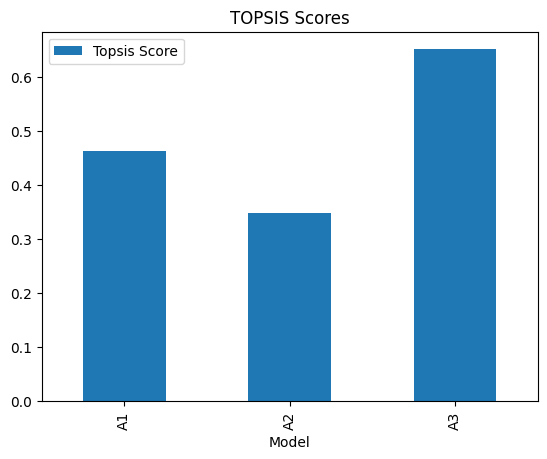

In [5]:
df.plot(x=df.columns[0], y='Topsis Score', kind='bar', title='TOPSIS Scores')
